# GW from CBC (inspiral phase)

The aim of this notebook is to compute, plot, and analyze GW from binary systems in the inspiral phase

An inspiral waveform is described by the following nine parameters
- $D$                    distance to the binary
- $m_1$                  mass of the first binary component
- $m_2$                  mass of the second binary component
- $\iota$                inclination angle of the binary
- $\psi$                 polarization angle of the binary
- ($\theta$,$\varphi$)   sky coordinates of the binary
- $t_{coal}$             end time of the inspiral
- $\phi_o$               orbital phase of the binary


# User definitions

You can modify these parameters as needed


In [1]:
# -------------------------------
# Physical parameters of the binary system
m1Mo           = 36                # Mass 1 (units of solar masses)
m2Mo           = 29                # Mass 2 (units of solar masses)
DMpc           = 420               # Distance (in Mpc)
iota           = 1.05              # Angle iota [-pi,pi] (in rad) - 60°==1.05


In [2]:
# -------------------------------
# Parameters imposed by the detector characteristics

# Chirp minimum frequency
flow           = 20                # (Hz)

# Default resampling frequency
fs             = 16384             # Sampling frequency (Hz)


In [3]:
# -------------------------------
# Post-Neutonian order
PNorder        = 1                 # (0,  1.0,  1.5,  2.0,  2.5,  3.0,  3.5)


In [4]:
# -------------------------------
# Define path
Ruta            = "/content/drive/My Drive/Colab Notebooks/ToolboxPostNewtonian/"


In [5]:
# -------------------------------
# For debugging
doprint        = True              # (False: no  | True: yes)
doplot         = True              # (False: no  | True: yes)


In [6]:
# -------------------------------
# OTROS PARAMETROS QUE SE REQUIEREN ENTENDER

# -------------------------------
# Termination phase
phi_0         = 0


# Import libraries

In [7]:
# -------------------------------
# Import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import pandas as pd
#import seaborn as sns

# -------------------------------
# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

# -------------------------------
# Insert the directory
import sys
sys.path.insert(0,Ruta)

# -------------------------------
# Import custom made functions
import ToolboxPostNewtonian as PN


Mounted at /content/drive


# 1. Calculations

Compute information as $m_1$ and $m_2$ in MKS units, reduced mas $\mu$, symmetric mass ratio $\eta$, duration of the signal $T_{chirp}$, etc.

In [8]:
# -------------------------------
# Compute all the information
D, m1, m2, Mtotal, mu, eta, Mchirp, fisco, Ncyc, Tchirp, Nsamples, \
t, t_coal, phi_coal = PN.physicalinformation(DMpc, m1Mo, m2Mo, flow, fs, PNorder, doprint)


Distance:                              1.30e+25 m
Mass 1:                                7.16e+31 kg
Mass 2:                                5.77e+31 kg
Total mass:                            1.29e+32 kg
Reduced mass ($\mu$):                  3.19e+31 kg
Symmetric mass ratio ($
u$):          0.25
Chirp mass:                            5.59e+31 kg
Frequency isco:                        67.65 Hz
Number of cycles:                      23.50
Duration of the GW signal:             1.19 s
Number of samples in the GW signal:    19453


# 2. Compute $\Theta(t)$


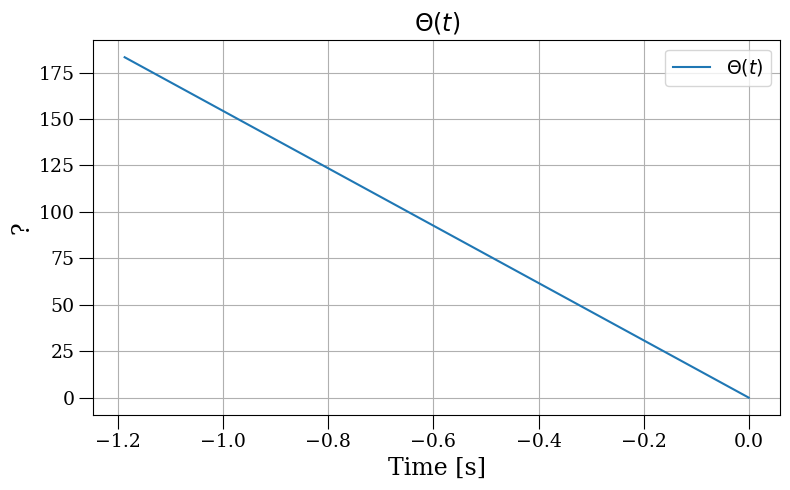

In [9]:
# -------------------------------
# Compute and plot $\Theta(t)$
Thetat = PN.Thetat(eta, Mtotal, t_coal, t, doplot)


# 3. Compute $\phi(t)$ and $f(t)$



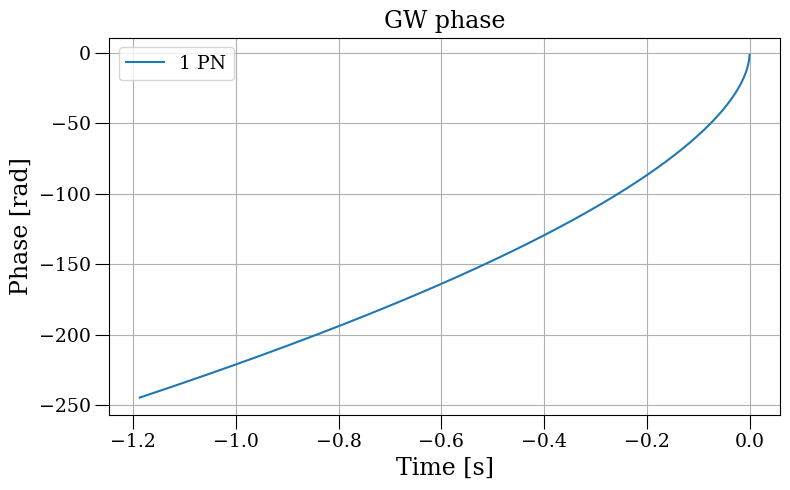

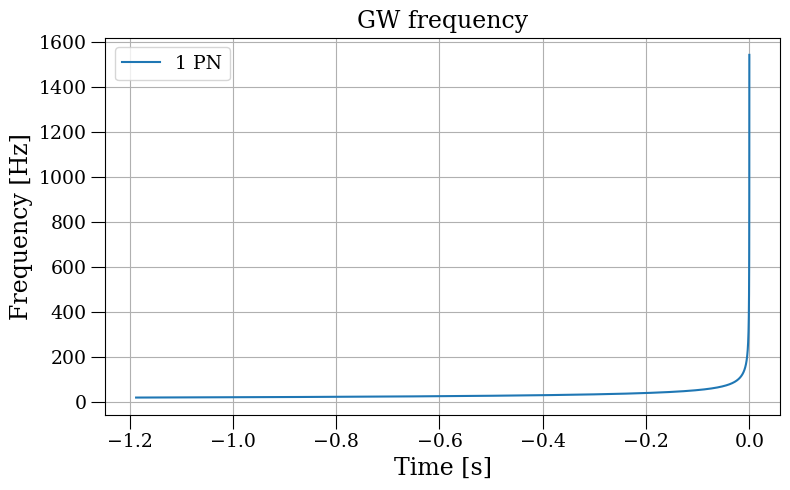

In [10]:
# -------------------------------
# Compute the phase and frequency of the GW
phit, ft = PN.gwphaseandfrequency(PNorder, Thetat, eta, Mtotal, phi_0, t, doplot)


# 4. Compute $h_{+}(t)$ and $h_{\times}(t)$


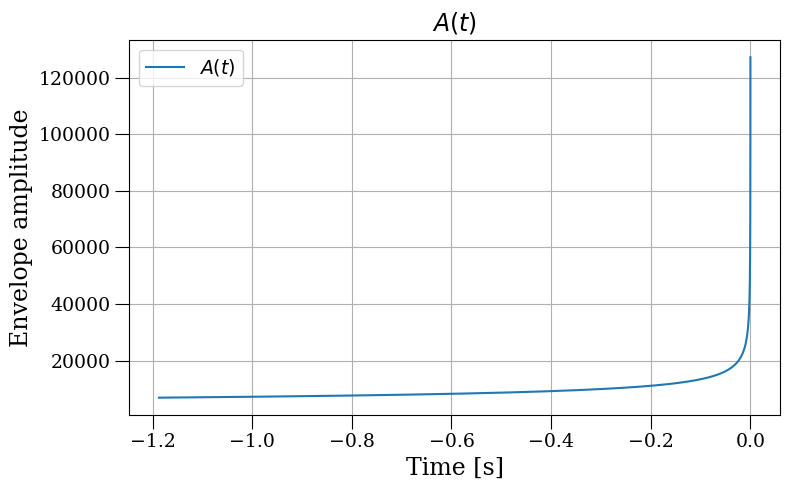

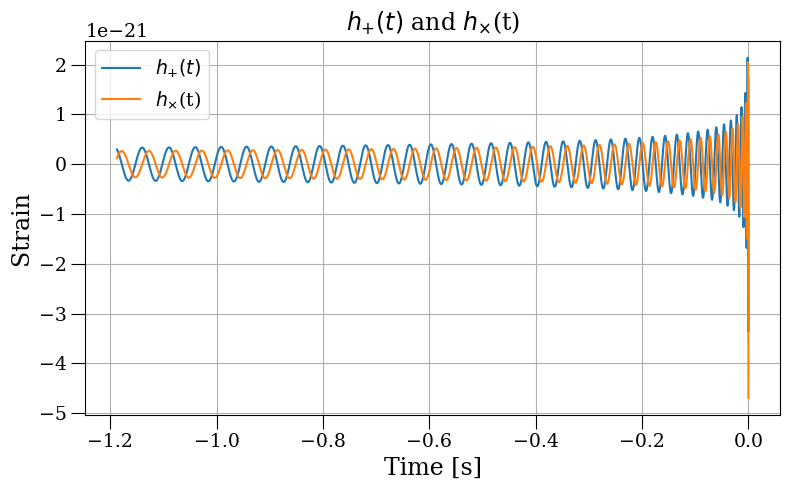

In [11]:
# -------------------------------
# Compute GW: hp and hc polarizations
hp, hc, At = PN.hphc(phit, ft, Mchirp, D, iota, t, doplot)


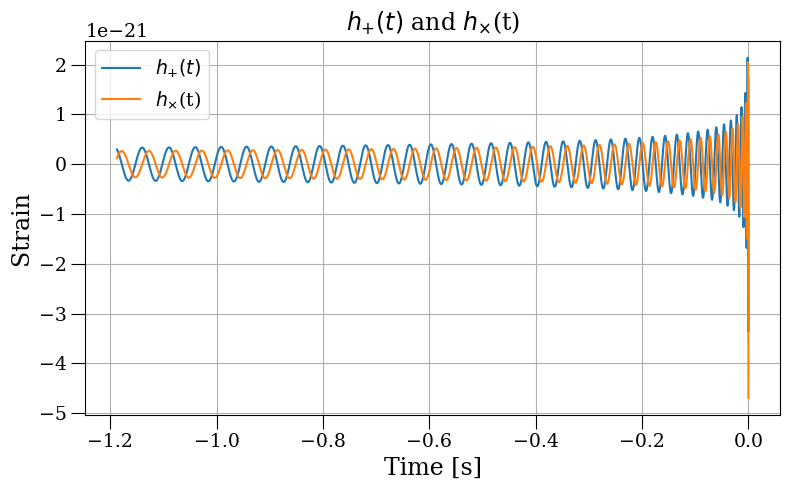

In [12]:
# -------------------------------
# Plot GW signal hp and hc
plt.figure()
plt.plot(t-t[-1], hp, label=r"$h_{+}(t)$")
plt.plot(t-t[-1], hc, label=r"$h_{\times}$(t)")
plt.title(r"$h_{+}(t)$ and $h_{\times}$(t)")
plt.xlabel('Time [s]')
plt.ylabel('Strain')
plt.grid()
#plt.xlim(-0.1,0.001)
plt.legend()
plt.tight_layout()
plt.show()
